# Logistic Regression 

## import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

## load training data

In [2]:
fname_data = 'assignment_08_data.csv'

data = np.genfromtxt(fname_data, delimiter=',')
num_data = data.shape[0]

point_x = np.zeros(num_data)
point_y = np.zeros(num_data)
label   = np.zeros(num_data)

for i in range(num_data):

    point_x[i]  = data[i,0]
    point_y[i]  = data[i,1]
    label[i]    = data[i,2]


## define linear regression function with inputs $\theta = (\theta_0, \theta_1, \theta_2)$ and ${\rm point} = (1, x, y)$

In [3]:
def linear_regression(theta, point):
    # (600x3)@(3x1)=(600x1)
    value = point @ theta
    
    return value

## define sigmoid function with input $x$

In [4]:
def sigmoid(x):
    z = 1 / (1 + np.exp(-x))

    return z

## define loss function for the logistic regression

In [5]:
def compute_loss(h, label, num_data):
    loss = (1/num_data) * (((-label).T @ np.log(h)) - ((1-label).T @ np.log(1-h)))
    
    return loss

## define gradient vector for the model parameters $\theta = (\theta_0, \theta_1, \theta_2)$

In [6]:
def compute_gradient(theta, num_data, label, x):
    gradient = (1 / num_data) * (x.T @ (sigmoid(x @ theta) - label))

    return gradient

## gradient descent for the model parameters $\theta = (\theta_0, \theta_1, \theta_2)$

In [7]:
num_iteration   = 5000  # USE THIS VALUE for the number of gradient descent iterations 
learning_rate   = 0.001 # USE THIS VALUE for the learning rate
theta           = np.array((0, 0, 0))   # USE THIS VALUE for the initial condition of the model parameters

point_x = point_x[:, np.newaxis]
point_y = point_y[:, np.newaxis]
label = label[:, np.newaxis]
theta = theta[:, np.newaxis]
one = np.ones((num_data, 1))

point = np.hstack((one, point_x, point_y))
theta_iteration = np.zeros((num_iteration, theta.size))
loss_iteration = np.zeros(num_iteration)

## iterations for the gradient descent

In [8]:
for i in range(num_iteration):
    value = linear_regression(theta, point)
    h = sigmoid(value)
    loss = compute_loss(h, label, num_data)
    theta = theta - learning_rate * compute_gradient(theta, num_data, label, point)
    loss_iteration[i] = loss
    theta_iteration[i] = np.squeeze(theta)
    
    if i % 500 == 0:
        print("iteration = %4d, loss = %5.5f" % (i, loss))

iteration =    0, loss = 0.69315
iteration =  500, loss = 0.12546
iteration = 1000, loss = 0.11391
iteration = 1500, loss = 0.11039
iteration = 2000, loss = 0.10889
iteration = 2500, loss = 0.10813
iteration = 3000, loss = 0.10772
iteration = 3500, loss = 0.10748
iteration = 4000, loss = 0.10733
iteration = 4500, loss = 0.10724


## plot the results

In [9]:
def plot_loss_curve(loss_iteration):

    plt.figure(figsize=(8,6))   
    plt.title('loss')
    
    plt.plot(list(range(num_iteration)), loss_iteration, '-', color = 'red')

    plt.xlabel('iteration')
    plt.ylabel('loss')

    plt.tight_layout()
    plt.show()

In [10]:
def plot_data(data):
    
    plt.figure(figsize=(8,8))

    plt.title('training data')
    
    class_0_x = []
    class_0_y = []
    class_1_x = []
    class_1_y = []
    
    for i in range(num_data):
        if data[i,2] == 0:
            class_0_x.append(data[i, 0])
            class_0_y.append(data[i, 1])
        else:
            class_1_x.append(data[i, 0])
            class_1_y.append(data[i, 1])
            
    plt.plot(class_0_x, class_0_y, '.', color = 'blue', label = 'class = 0')
    plt.plot(class_1_x, class_1_y, '.', color = 'red', label = 'class = 1')

    plt.axis('equal')
    plt.legend(loc = 'upper right')
    plt.tight_layout()
    plt.show()

In [11]:
def plot_model_parameter(theta_iteration):

    plt.figure(figsize=(8,6))
    plt.title('model parameter')
    
    plt.plot(list(range(num_iteration)), theta_iteration[:, 0], '-', color = 'red', label = r'$\Theta_0$')
    plt.plot(list(range(num_iteration)), theta_iteration[:, 1], '-', color = 'green', label = r'$\Theta_1$')
    plt.plot(list(range(num_iteration)), theta_iteration[:, 2], '-', color = 'blue', label = r'$\Theta_2$')

    plt.xlabel('iteration')
    plt.legend(loc = 'center right')

    plt.tight_layout()
    plt.show()

In [12]:
x = np.arange(-14, 30, 0.05)
y = np.arange(-14, 30, 0.05)

grid_x, grid_y = np.meshgrid(x, y)
grid_h = np.zeros((len(x), len(y)))

for i in range(len(x)):
    for j in range(len(y)):
        value =sigmoid(theta[0] + theta[1]*x[i] + theta[2]*y[j])
        grid_h[i][j] = value

def plot_classifier(data, grid_x, grid_y, grid_h):

    # original data
    class_0_x = []
    class_0_y = []
    class_1_x = []
    class_1_y = []
    
    for i in range(num_data):
        if data[i,2] == 0:
            class_0_x.append(data[i, 0])
            class_0_y.append(data[i, 1])
        else:
            class_1_x.append(data[i, 0])
            class_1_y.append(data[i, 1])
            
    plt.plot(class_0_x, class_0_y, '.', color = 'blue', label = 'class = 0')
    plt.plot(class_1_x, class_1_y, '.', color = 'red', label = 'class = 1')
    
    # contour
    c = plt.contour(grid_x, grid_y, grid_h, 500, cmap='RdBu',
               vmin = 0, vmax = 1)
    plt.contour(grid_x, grid_y, grid_h, levels=[.5], cmap='Dark2',
               vmin = 0, vmax = 1)
    plt.colorbar(c)
    plt.axis('equal')
    plt.legend()
    plt.tight_layout()
    plt.show()

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

# * results

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

### # 01. plot the input data point in blue for class 0 and in red for class 1

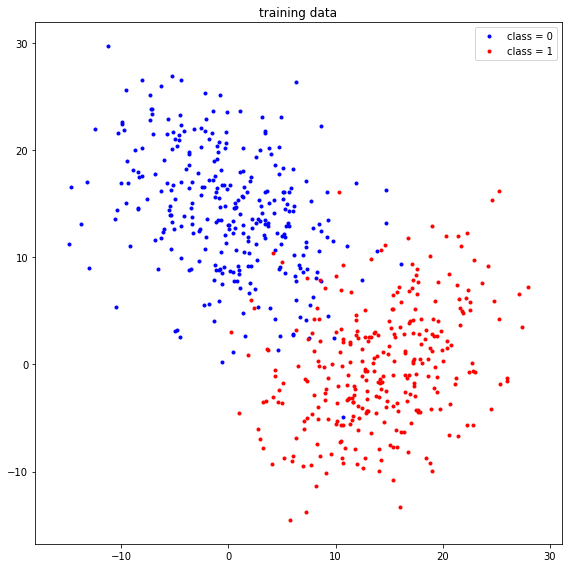

In [13]:
plot_data(data)

### # 02. plot the values of the model parameters $\theta_0$ in red curve, $\theta_1$ in green curve, and $\theta_2$ in blue curve over the gradient descent iterations

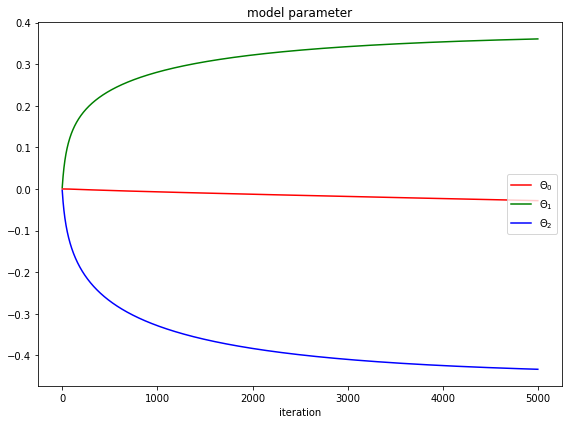

In [14]:
plot_model_parameter(theta_iteration)

### # 03. plot the loss values $\mathcal{L}(\theta)$ in red curve over the gradient descent iterations

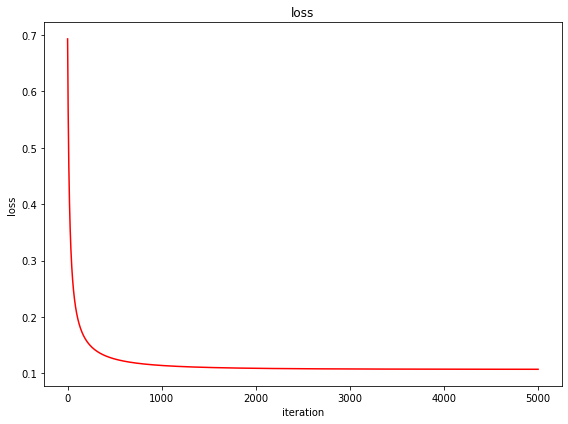

In [15]:
plot_loss_curve(loss_iteration)

### # 04. plot the classifier with the given data points superimposed

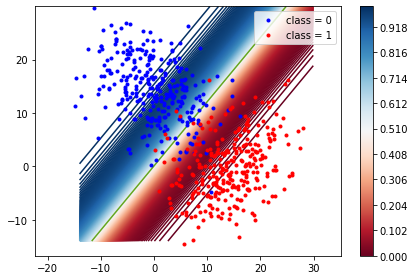

In [16]:
plot_classifier(data, grid_x, grid_y, grid_h)